In [25]:
library(tidyverse)
library(readxl)
#library(sqldf)
install.packages("sqldf")

Installing package into 'C:/Users/Shreya/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'cachem', 'memoise', 'Rcpp', 'plogr', 'gsubfn', 'proto', 'RSQLite', 'chron'




  There are binary versions available but the source versions are later:
        binary  source needs_compilation
cachem   1.0.4   1.0.6              TRUE
memoise  2.0.0   2.0.1             FALSE
Rcpp     1.0.6 1.0.8.3              TRUE
RSQLite  2.2.7  2.2.14              TRUE

  Binaries will be installed
package 'cachem' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'plogr' successfully unpacked and MD5 sums checked
package 'gsubfn' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'chron' successfully unpacked and MD5 sums checked
package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Shreya\AppData\Local\Temp\Rtmpa0MBXp\downloaded_packages


installing the source package 'memoise'



**Problem 1:** On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:51
3,44,861,144,1,cash,2017-03-14 04:23:55
4,18,935,156,1,credit_card,2017-03-26 12:43:36
5,18,883,156,1,credit_card,2017-03-01 04:35:10
6,58,882,138,1,credit_card,2017-03-14 15:25:00


[1] 3145.128

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     90     163     284    3145     390  704000 


   1    2    3    4    5    6    8 2000 
1830 1832  941  293   77    9    1   17 

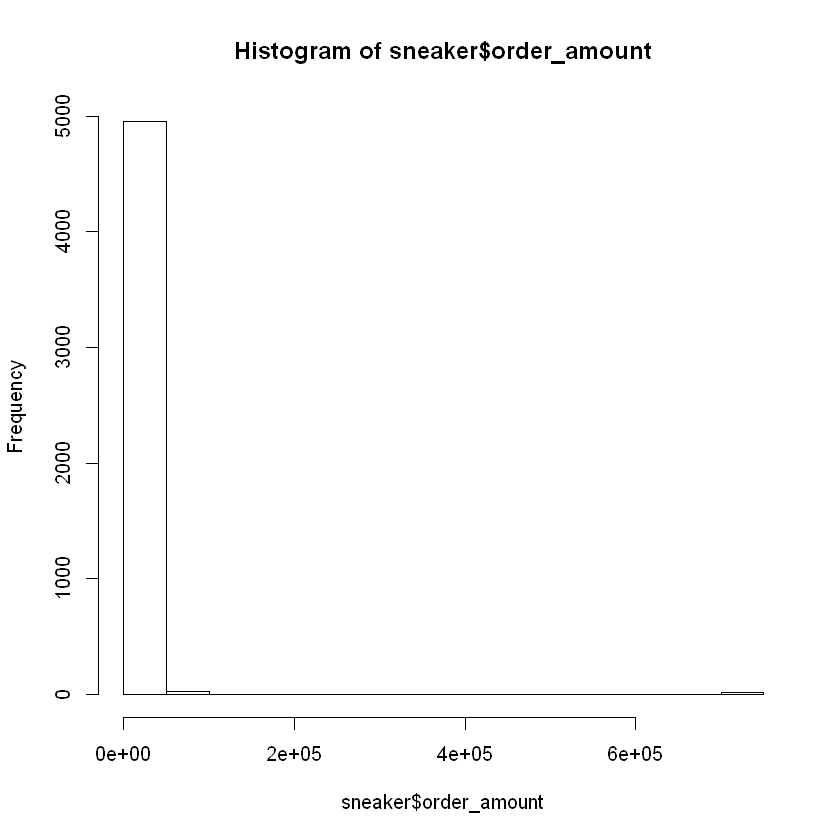

In [26]:
sneaker <- read_xlsx("2019 Winter Data Science Intern Challenge Data Set.xlsx")
head(sneaker)

mean(sneaker$order_amount)

summary(sneaker$order_amount)
hist(sneaker$order_amount)
table(sneaker$total_items)

The total number items in the order differs for each order, so we need to fix that to make sense of the AOV.

2. What metric would you report for this dataset?

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   90.0   133.0   153.0   387.7   169.0 25725.0 


   90    94   101   111   112   114   116   117   118   122   127   128   129 
   42    55    42    40   124    59    58    77   118    50    52    93   142 
  130   131   132   133   134   136   138   140   142   144   145   146   147 
  150    97    46   151    86   105    59    55   197    39    92    89    53 
  148   149   153   154   155   156   158   160   161   162   163   164   165 
  101    52   256    54    42   197    94   206   101    48   122   161    58 
  166   168   169   171   172   173   176   177   178   181   184   187   190 
   43    39    54    48    35    99   152   148   109   112    49   105    35 
  193   195   196   201   352 25725 
   44    54    61    53    51    46 

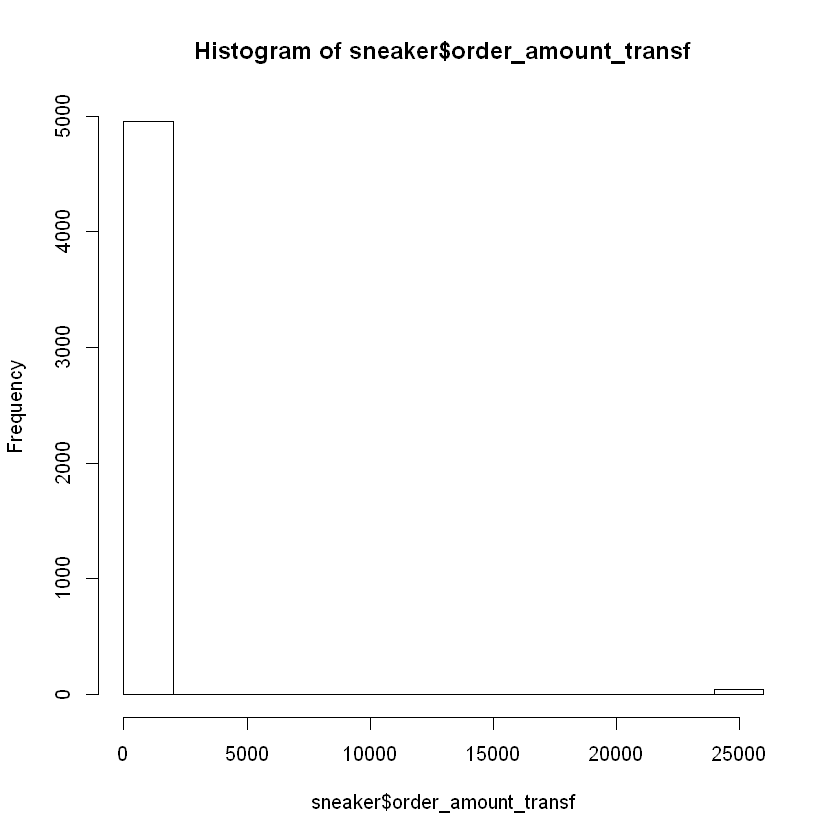

In [19]:
#transforming order amount
sneaker <- sneaker %>% mutate(order_amount_transf = order_amount/total_items)
summary(sneaker$order_amount_transf)
table(sneaker$order_amount_transf)
hist(sneaker$order_amount_transf)

- We find the average of each item in an order by dividing total amount by the number of items.
- Once we do that we could average the transformed order amount values, but an issue with this approach is that there are 46 outliers with anomalously high values while the others are all centered around the same values. 
- In this case, we could look at the median of the transformed amounts since it's not influenced by those outliers. 

3. What is its value?

In [21]:
median(sneaker$order_amount_transf)

[1] 153

Another alternative is removing the abnormally high amounts and finding the average of the remaining ones. 

In [22]:
mean(sneaker$order_amount_transf[sneaker$order_amount_transf < 25725])

[1] 152.4756

There both approximately give us the same insight.

**Problem 2:** For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?

SELECT COUNT(*) FROM Orders<br>
LEFT JOIN Shippers on Orders.ShipperID = Shippers.ShipperID<br>
WHERE ShipperName = 'Speedy Express'

<br>

Answer: **54**

2. What is the last name of the employee with the most orders?

SELECT LastName, COUNT(*) as Num_Orders<br>
FROM Orders o<br>
LEFT JOIN Employees e<br> 
ON o.EmployeeID = e.EmployeeID<br>
GROUP BY LastName<br>
ORDER BY Num_Orders DESC

<br>

Answer: **Peacock**

3. What product was ordered the most by customers in Germany?

I intepreted this as what product was most ordered by *quantity* in Germany. So the same Customer ordering 100 of the same product times is intepreted differently from ordering the same product once. 

SELECT ProductName, SUM(Quantity) as total<br>
FROM Orders o<br>
JOIN Customers c ON c.CustomerID = o.CustomerID<br>
JOIN OrderDetails od ON od.OrderID = o.OrderID<br>
JOIN Products p ON p.ProductID = od.ProductID<br>
WHERE Country = 'Germany'<br>
GROUP BY p.ProductID<br>
ORDER BY total DESC<br>
LIMIT 1;

<br>

Answer: **Boston Crab Meat (160)** 